In [1]:
import pyreadstat  as ps 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
import numpy as np
%matplotlib inline

In [2]:
path='00-Bases-de-dados/Professores/CY07_MSU_TCH_QQQ.sav'

In [3]:
# Importação do banco de dados redefinido
professoresDF, infoProfessores=ps.read_sav(path)


In [4]:
professoresDF['CNT'].unique()

array(['ALB', 'QAZ', 'BRA', 'CHL', 'TAP', 'DOM', 'DEU', 'HKG', 'KOR',
       'MAC', 'MYS', 'MAR', 'PAN', 'PER', 'PRT', 'ESP', 'ARE', 'GBR',
       'USA'], dtype=object)

In [5]:

dicSigla = {
"ALB" : "Albânia",
"ARE" : "Emirados Árabes Unidos",
"ARG" : "Argentina",
"AUS" : "Austrália",
"AUT" : "Áustria",
"BEL" : "Bélgica",
"BGR" : "Bulgária",
"BIH" : "Bósnia e Herzegovina",
"BLR" : "Bielorrússia",
"BRA" : "Brasil",
"BRN" : "Brunei Darussalam",
"CAN" : "Canadá",
"CHE" : "Suíça",
"CHL" : "Chile",
"COL" : "Colômbia",
"CRI" : "Costa Rica",
"CZE" : "República Checa",
"DEU" : "Alemanha",
"DNK" : "Dinamarca",
"DOM" : "República Dominicana",
"ESP" : "Espanha",
"EST" : "Estônia",
"FIN" : "Finlândia",
"FRA" : "França",
"GBR" : "Reino Unido",
"GEO" : "Geórgia",
"GRC" : "Grécia",
"HKG" : "Hong Kong",
"HRV" : "Croácia",
"HUN" : "Hungria",
"IDN" : "Indonésia",
"IRL" : "Irlanda",
"ISL" : "Islândia",
"ISR" : "Israel",
"ITA" : "Itália",
"JOR" : "Jordânia",
"JPN" : "Japão",
"KAZ" : "Cazaquistão",
"KOR" : "Coréia",
"KSV" : "Kosovo",
"LBN" : "Líbano",
"LTU" : "Lituânia",
"LUX" : "Luxemburgo",
"LVA" : "Letônia",
"MAC" : "Macau",
"MAR" : "Marrocos",
"MDA" : "Moldova",
"MEX" : "México",
"MKD" : "Macedônia do Norte",
"MLT" : "Malta",
"MNE" : "Montenegro",
"MYS" : "Malásia",
"NLD" : "Países Baixos",
"NOR" : "Noruega",
"NZL" : "Nova Zelândia",
"PAN" : "Panamá",
"PER" : "Peru",
"PHL" : "Filipinas",
"POL" : "Polônia",
"PRT" : "Portugal",
"QAT" : "Catar",
"QAZ" : "Baku, (Azerbaijão)",
"QCI" : "B-S-J-Z (China)",
"QCY" : "Chipre",
"QMC" : "Cidade de Moscou (RUS)",
"QMR" : "Região de Moscou (RUS)",
"QRT" : "Tartaristão (RUS)",
"ROU" : "Romênia",
"RUS" : "Federação Russa",
"SAU" : "Arábia Saudita",
"SGP" : "Cingapura",
"SRB" : "Sérvia",
"SVK" : "República Eslovaca",
"SVN" : "Eslovênia",
"SWE" : "Suécia",
"TAP" : "Taipei Chinês",
"THA" : "Tailândia",
"TUR" : "Turquia",
"UKR" : "Ucrânia",
"URY" : "Uruguai",
"USA" : "Estados Unidos",
"VNM" : "Vietnã"
}
professoresDF['CNT'] = professoresDF['CNT'].map(dicSigla)

In [6]:
#TC005
# Pergunta: Qual é o seu status atual de emprego como professor?((Por favor, considere seu status de emprego nesta escola e para todos os seus demais empregos como professor juntos.)
# questão multipla escolha:
# o Valor 1 : Tempo Integral(mais que 90% das horas completas)
# o Valor 2 : Tempo Parcial(71-90% das horas completas) 
# o Valor 3 : Tempo Parcial(50-70% das  horas completas)
# o Valor 4 : Tempo parcial(Menos 50% das horas completas)


professoresDF['TC005Q01NA'].unique() # valores respondidos 

questao='TC005Q01NA'
dicQuest={
    1 : 'Tempo Integral(mais que 90% das horas completas)',
    2 : 'Tempo Parcial(71-90% das horas completas)',
    3 : 'Tempo Parcial(50-70% das  horas completas)',
    4 : 'Tempo parcial(Menos 50% das horas completas)'
}

legenda="Status atual de emprego como professor:"

professoresDF[questao].unique() #possiveis respostas

professoresDF[questao] = professoresDF[questao].map(dicQuest)

In [7]:

sns.set(color_codes=True)

#
df = professoresDF 
x,y = 'CNT', questao
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

df1


,CNT,TC005Q01NA,percent
0,Albânia,Tempo Integral(mais que 90% das horas completas),95.677678
1,Albânia,Tempo Parcial(71-90% das horas completas),1.945045
2,Albânia,Tempo Parcial(50-70% das horas completas),1.420191
3,Albânia,Tempo parcial(Menos 50% das horas completas),0.957086
4,Alemanha,Tempo Integral(mais que 90% das horas completas),63.919414
...,...,...,...
71,República Dominicana,Tempo parcial(Menos 50% das horas completas),1.512532
72,Taipei Chinês,Tempo Integral(mais que 90% das horas completas),95.807645
73,Taipei Chinês,Tempo parcial(Menos 50% das horas completas),2.540074
74,Taipei Chinês,Tempo Parcial(71-90% das horas completas),0.986436


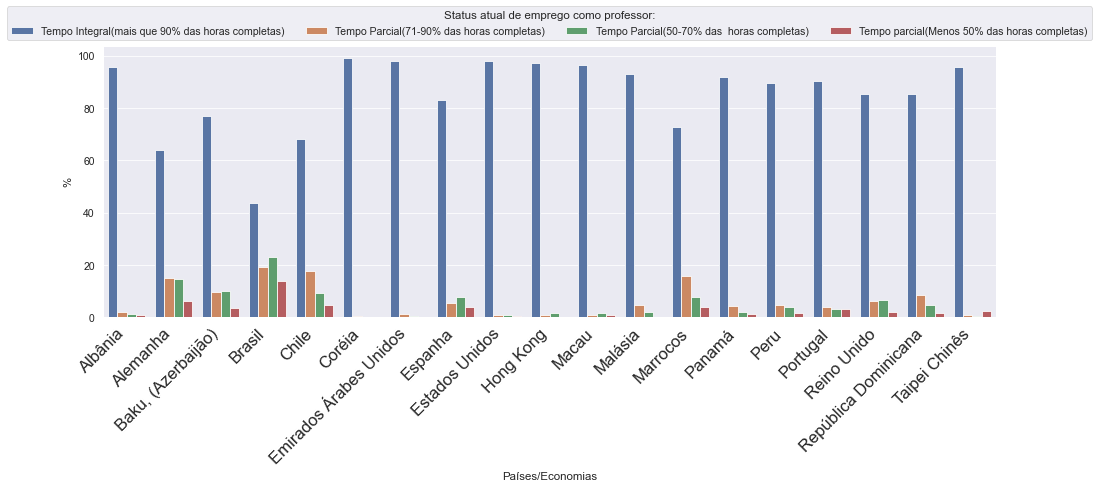

In [8]:


plt.figure(figsize=(16,5))
sns.set_context("paper",font_scale=1.2)
plot = sns.barplot(x='CNT',y='percent',data=df1,hue=y,palette='deep')
plt.xticks(
   rotation=45, 
   horizontalalignment='right',
   fontweight='light',
   fontsize='x-large'  
)
plt.legend(loc='upper right')
plot.set(xlabel='Países/Economias',ylabel='%')
leg = plot.get_legend()
#leg.set_title("Tempo de estudo em países extrangeiros")
sns.move_legend(plot, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=legenda, frameon=True)